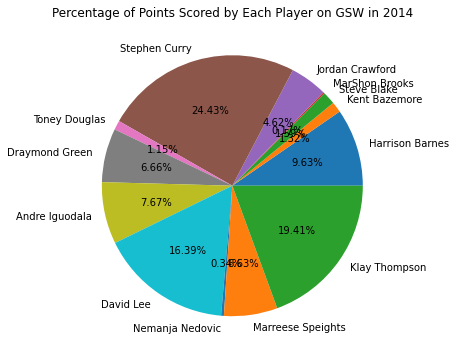

In [12]:
import pyspark
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.filter(df.Year == 2014)
df = df.filter(df.Tm == 'GSW')
df = df.drop('blanl', 'blank2')
df = df.dropna()

total_points = df.agg({'PTS': 'sum'}).collect()[0][0]

df = df.withColumn('PTS_PCT', (df['PTS'] / total_points) * 100)

df_pdf = df.toPandas()

plt.figure(figsize=(10, 6))
plt.pie(df_pdf['PTS_PCT'], labels=df_pdf['Player'], autopct='%.2f%%')
plt.title('Percentage of Points Scored by Each Player on GSW in 2014')
plt.show()

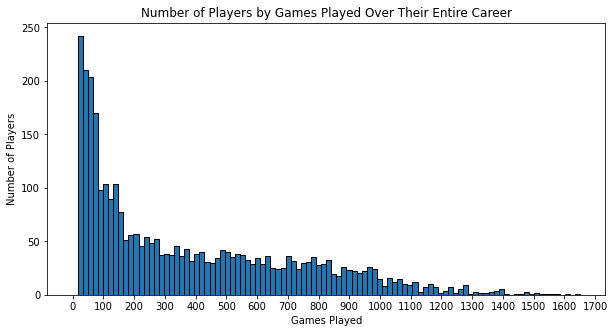

In [173]:
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()


df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.filter(df.G > 20)

total_games_df = df.groupBy('Player').agg({'G': 'sum'})
sorted_df = total_games_pdf.sort_values(by='sum(G)', ascending=False)


total_games_pdf = total_games_df.toPandas()



plt.figure(figsize=(10, 5))
plt.hist(total_games_pdf['sum(G)'], range=(0, 1650), bins=100, edgecolor='black')
plt.xlabel('Games Played')
plt.ylabel('Number of Players')
plt.title('Number of Players by Games Played Over Their Entire Career')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.show()

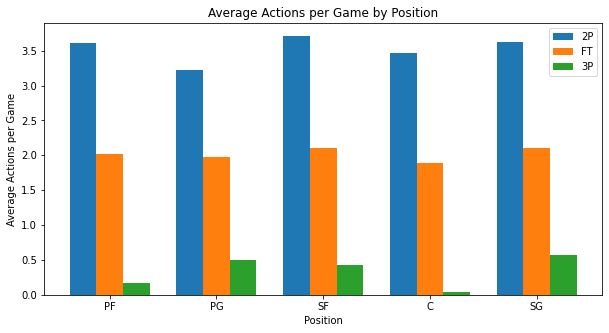

In [219]:
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)

filtered_df = df.filter(df['Pos'].isin(['PF', 'SF', 'SG', 'PG', 'C']))

avg_actions_df = filtered_df.groupBy('Pos').agg({
    '3P': 'sum',
    '2P': 'sum',
    'FT': 'sum',
    'G': 'sum'
})

avg_actions_df = avg_actions_df.select(
    'Pos',
    (avg_actions_df['sum(3P)'] / avg_actions_df['sum(G)']).alias('avg(3P)'),
    (avg_actions_df['sum(2P)'] / avg_actions_df['sum(G)']).alias('avg(2P)'),
    (avg_actions_df['sum(FT)'] / avg_actions_df['sum(G)']).alias('avg(FT)')
)

avg_actions_pdf = avg_actions_df.toPandas()

plt.figure(figsize=(10, 5))
bar_width = 0.25
x = np.arange(len(avg_actions_pdf['Pos']))

plt.bar(x - bar_width, avg_actions_pdf['avg(2P)'], bar_width, label='2P')
plt.bar(x, avg_actions_pdf['avg(FT)'], bar_width, label='FT')
plt.bar(x + bar_width, avg_actions_pdf['avg(3P)'], bar_width, label='3P')

plt.xticks(x, avg_actions_pdf['Pos'])
plt.xlabel('Position')
plt.ylabel('Average Actions per Game')
plt.title('Average Actions per Game by Position')
plt.legend()
plt.show()

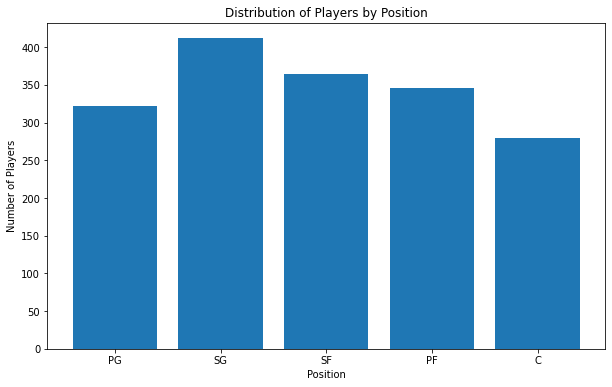

In [421]:
import pyspark
from pyspark.sql import SparkSession
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.filter(df.Year > 2000)
df = df.filter(df.G > 20)
df = df.drop('blanl', 'blank2')
df = df.dropna()

df = df.withColumn('PosNumber', when(df.Pos == 'PG', 0).when(df.Pos == 'SG', 1).when(df.Pos == 'SF', 2).when(df.Pos == 'PF', 3).when(df.Pos == 'C', 4))
df_pdf = df.toPandas()
position_counts = df_pdf.groupby('PosNumber')['Player'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(("PG","SG","SF","PF","C"), position_counts.values)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Position')
plt.show()

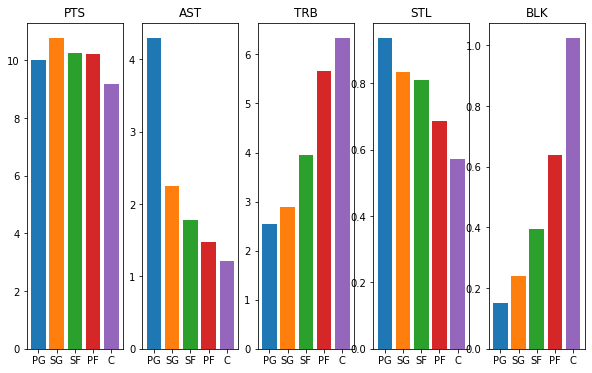

In [423]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import when

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()


df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.filter(df.Year > 2000)
df = df.filter(df.G > 20)
df = df.drop('blanl', 'blank2')
df = df.dropna()

df = df.withColumn('PosNumber', when(df.Pos == 'PG', 0).when(df.Pos == 'SG', 1).when(df.Pos == 'SF', 2).when(df.Pos == 'PF', 3).when(df.Pos == 'C', 4))

df_pdf = df.toPandas()

stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
positions = ['PG', 'SG', 'SF', 'PF', 'C']
for pos in positions:
    pos_df = df_pdf[df_pdf['Pos'] == pos]
    mean_stats = pos_df[stats].mean() / pos_df['G'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
for i, stat in enumerate(stats):
    plt.subplot(1, 5, i+1)
    for pos in positions:
        pos_df = df_pdf[df_pdf['Pos'] == pos]
        mean_stat = pos_df[stat].mean() / pos_df['G'].mean()
        plt.bar(pos, mean_stat)
    plt.title(stat)
plt.show()

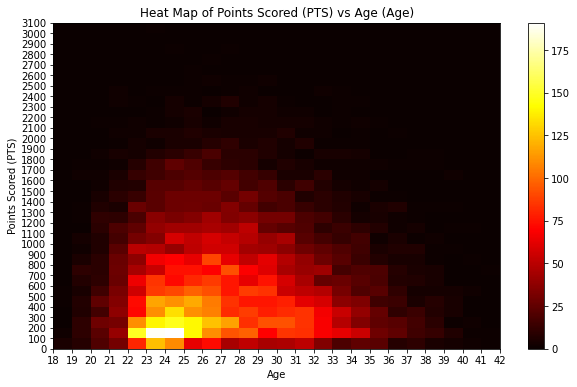

In [8]:
import pyspark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)


df = df.filter(df.G > 20)
df = df.filter(df.Age > 14)
df = df.drop('blanl', 'blank2')
df = df.dropna()

df = df.toPandas()

H, xedges, yedges = np.histogram2d(df['Age'], df['PTS'], bins=[np.arange(df['Age'].min(), df['Age'].max() + 1), np.arange(0, df['PTS'].max() + 100, 100)])


plt.figure(figsize=(10, 6))
plt.pcolormesh(xedges, yedges, H.T, cmap='hot')
plt.xlabel('Age')
plt.ylabel('Points Scored (PTS)')
plt.title('Heat Map of Points Scored (PTS) vs Age (Age)')
plt.colorbar()
plt.yticks(np.arange(0, df['PTS'].max() + 100, 100))
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 1))
plt.show()

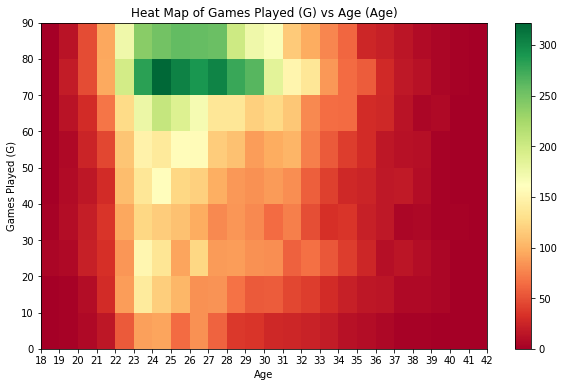

In [2]:
import pyspark
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.drop('blanl', 'blank2')
df = df.dropna()

df = df.toPandas()


H, xedges, yedges = np.histogram2d(df['Age'], df['G'], bins=[np.arange(df['Age'].min(), df['Age'].max() + 1), np.arange(0, df['G'].max() + 12, 10)])

plt.figure(figsize=(10, 6))
plt.pcolormesh(xedges, yedges, H.T, cmap='RdYlGn')
plt.xlabel('Age')
plt.ylabel('Games Played (G)')
plt.title('Heat Map of Games Played (G) vs Age (Age)')
plt.colorbar()
plt.yticks(np.arange(0, df['G'].max() + 10, 10))
plt.xticks(np.arange(df['Age'].min(), df['Age'].max() + 1, 1))
plt.show()

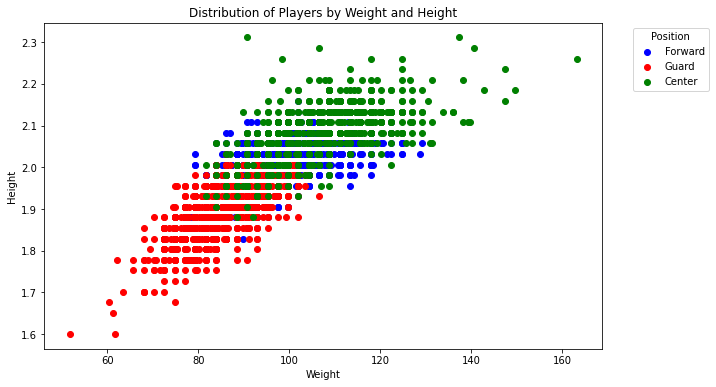

In [9]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import when,split,col
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('player_data.csv', header=True, inferSchema=True)


df = df.withColumn('PosNumber', when(df.position == 'F', 0).when(df.position == 'G', 1).when(df.position == 'C', 2).when(df.position == 'F-C', 2).when(df.position == 'C', 2))
df = df.dropna(subset=['PosNumber'])  

df = df.withColumn('Feet', split(col('Height'), '-').getItem(0).cast('int'))
df = df.withColumn('Inches', split(col('Height'), '-').getItem(1).cast('int'))
df = df.withColumn('WeightKg', df.weight / 2.205)
df = df.withColumn('HeightMeters', (col('Feet') * 0.3048) + (col('Inches') * 0.0254))

df_pdf = df.toPandas()

colors = {0: 'blue', 1: 'red', 2: 'green'}
colors_list = [colors[i] for i in df_pdf['PosNumber']]


plt.figure(figsize=(10, 6))
plt.scatter(df_pdf[df_pdf['PosNumber'] == 0]['WeightKg'], df_pdf[df_pdf['PosNumber'] == 0]['HeightMeters'], c='blue', label='Forward')
plt.scatter(df_pdf[df_pdf['PosNumber'] == 1]['WeightKg'], df_pdf[df_pdf['PosNumber'] == 1]['HeightMeters'], c='red', label='Guard')
plt.scatter(df_pdf[df_pdf['PosNumber'] == 2]['WeightKg'], df_pdf[df_pdf['PosNumber'] == 2]['HeightMeters'], c='green', label='Center')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Distribution of Players by Weight and Height')

plt.legend(loc='upper right', title='Position',bbox_to_anchor=(1.2, 1))
plt.show()

In [10]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import when
from pyspark.ml.evaluation import RegressionEvaluator

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()


df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.filter(df.G > 20)
df = df.drop('blanl', 'blank2')
df = df.dropna()


features = ["Year","Age","G","TS%","ORB%","DRB%","TRB%","AST%","STL%","BLK%","TOV%","USG%","FG%","3P%","2P%","eFG%","FT%","PF","PTS"]
assembler = VectorAssembler(inputCols=features, outputCol='PREDICT')


df = df.withColumn('PosNumber', when(df.Pos == 'PG', 0).when(df.Pos == 'SG', 1).when(df.Pos == 'SF', 2).when(df.Pos == 'PF', 3).when(df.Pos == 'C', 4))
df = df.dropna(subset=['PosNumber'])  

train_df, test_df = df.randomSplit([0.8, 0.2], seed=95)
lr_model = LinearRegression(featuresCol='PREDICT', labelCol='PosNumber',regParam=0.1)
pipeline = Pipeline(stages=[assembler, lr_model])
model = pipeline.fit(train_df)


predictions = model.transform(test_df)
predicted_positions = predictions.select('Year', 'Player','Pos', 'PosNumber', 'prediction')
predicted_positions.show(10)


2024-06-25 03:38:11,885 WARN netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
2024-06-25 03:38:11,885 WARN netlib.LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


+----+----------------+---+---------+------------------+
|Year|          Player|Pos|PosNumber|        prediction|
+----+----------------+---+---------+------------------+
|1981|     Larry Bird*| PF|        3| 2.460439750161684|
|1982|    Greg Ballard| SF|        2|2.1465882139514143|
|1982|     Mike Bantom| SF|        2| 2.523073390255904|
|1982|       Billy Ray| SG|        1|1.0332213851633147|
|1982|    Alex Bradley| SF|        2| 2.467994730895545|
|1982| Charles Bradley| SG|        1|1.4268210737366127|
|1982|Junior Bridgeman| SF|        2|1.4267448384191965|
|1982|      Fred Brown| SG|        1|0.6845160640836268|
|1982|   Quinn Buckner| PG|        0|0.6397314230927416|
|1982|    Tom Chambers| PF|        3| 3.070113571779662|
+----+----------------+---+---------+------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE):  0.6096880606847351


+----+------------+---+---------+-----------------------------------------------------------------------------------------------------+
|Year|Player      |Pos|PosNumber|probability                                                                                          |
+----+------------+---+---------+-----------------------------------------------------------------------------------------------------+
|2011|Trevor Ariza|SF |2        |[0.00885815374987844,0.25184920424302826,0.6072706634573916,0.12199246817459859,0.010029510375103263]|
+----+------------+---+---------+-----------------------------------------------------------------------------------------------------+
only showing top 1 row



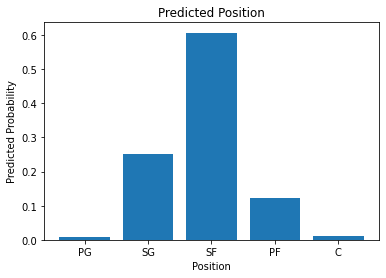

In [11]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import when
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .master("local") \
    .appName("MyApp") \
    .getOrCreate()

df = spark.read.csv('Seasons_Stats.csv', header=True, inferSchema=True)
df = df.drop('blanl', 'blank2')
df = df.dropna()

features = ["Year","Age","G","TS%","ORB%","DRB%","TRB%","AST%","STL%","BLK%","TOV%","USG%","FG%","3P%","2P%","eFG%","FT%","PF","PTS"]
assembler = VectorAssembler(inputCols=features, outputCol='PREDICT')

df = df.withColumn('PosNumber', when(df.Pos == 'PG', 0).when(df.Pos == 'SG', 1).when(df.Pos == 'SF', 2).when(df.Pos == 'PF', 3).when(df.Pos == 'C', 4))
df = df.dropna(subset=['PosNumber']) 


train_df, test_df = df.randomSplit([0.9, 0.1], seed=42)
lr_model = LogisticRegression(featuresCol='PREDICT', labelCol='PosNumber', family='multinomial')
pipeline = Pipeline(stages=[assembler, lr_model])
model = pipeline.fit(train_df)

predictions = model.transform(test_df)

predicted_positions = predictions.select('Year', 'Player','Pos','PosNumber', 'probability')

player_positions = predicted_positions.filter(predicted_positions.Year == 2011)
player_positions.show(1, truncate=False)


probabilities = [row.probability.toArray() for row in player_positions.collect()]



labels = ['PG', 'SG', 'SF', 'PF', 'C']
plt.bar(labels, probabilities[0])  
plt.xlabel('Position')
plt.ylabel('Predicted Probability')
plt.title('Predicted Position')
plt.show()
